Life Cycle of a ML Project
- Understanding the Problem Statement
- Data Collection
- Data Checks
- EDA
- Data Preprocessing
- Model Training
- Choosing the best model

1) Problem Statement:
- This project understands how the student's performance/test score is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation courses.

2) Data Collection:
- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dataset consists of 8 columns and 1000 rows.

In [1]:
# 2.1 Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the csv data as a pandas dataframe
df = pd.read_csv('data/stud.csv')

In [3]:
# Observe top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape      # Shape of the dataset

(1000, 8)

2.2 Dataset Information
- Gender: Male/Female
- Ethinicity: Groups A, B, C, D, E
- Parental level of education: Master's Degree, Bachelor's Degree, Associate's Degree, Some College, High School, Some High School
- Lunch: Having lunch before test (standard or free)
- Test preparation course: Completed or not completed before test
- Math score
- Reading score
- Writing score

3. Data Checks
- Missing values
- Duplicates
- Data type
- Unique values
- Statistics
- Various categories in the categorical column

In [5]:
# 3.1 Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

In [6]:
# 3.2 Duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [7]:
# 3.3 Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# 3.4 Unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# 3.5 Statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
- From the above description of numerical data, all means are very close to each other; between 66 and 68.05.
- All standard deviations are also close.
- The minimum score for math is 0, for reading it is 10 and for writing it is 17.

In [10]:
# 3.7 Exploring the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in gender are:", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity are:", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education are:", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch are:", end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course are:", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender are: ['female' 'male']
Categories in race_ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are: ['standard' 'free/reduced']
Categories in test_preparation_course are: ['none' 'completed']


In [12]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
# 3.8 Adding total_score and average_score columns
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

print(f"Number of students with full marks in Math are: {math_full}")
print(f"Number of students with full marks in Reading are: {reading_full}")
print(f"Number of students with full marks in Writing are: {writing_full}")

Number of students with full marks in Math are: 7
Number of students with full marks in Reading are: 17
Number of students with full marks in Writing are: 14


In [15]:
math_lessthan_20 = df[df['math_score'] < 20]['average_score'].count()
reading_lessthan_20 = df[df['reading_score'] < 20]['average_score'].count()
writing_lessthan_20 = df[df['writing_score'] < 20]['average_score'].count()

print(f"Number of students with marks less than 20 in Math are: {math_lessthan_20}")
print(f"Number of students with marks less than 20 in Reading are: {reading_lessthan_20}")
print(f"Number of students with marks less than 20 in Writing are: {writing_lessthan_20}")

Number of students with marks less than 20 in Math are: 4
Number of students with marks less than 20 in Reading are: 1
Number of students with marks less than 20 in Writing are: 3


Insights:
- Students have performed the worst in Math
- Students have performed the best in Reading

4. Visualizing the data

4.1 Visualize the average score distribution using Histogram and KDE (Kernel Distribution Function)

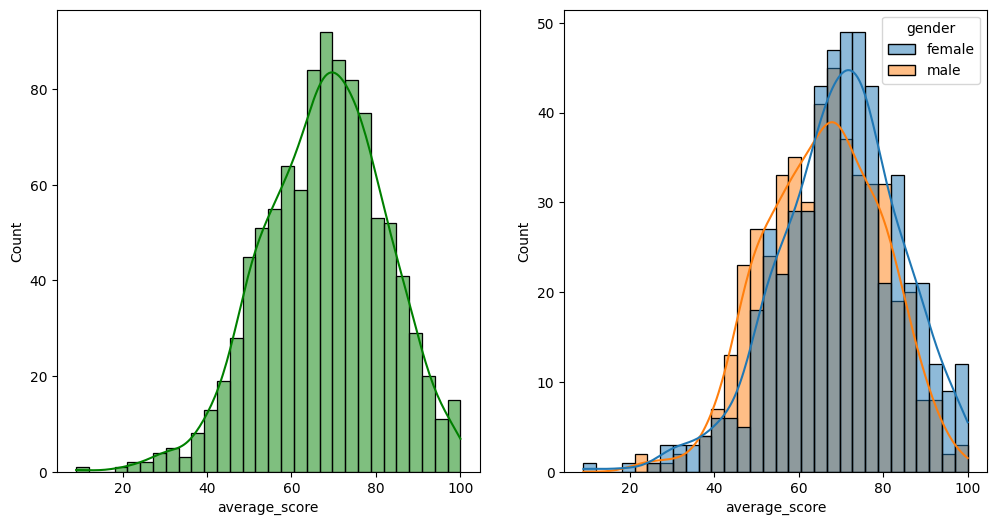

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='gender')
plt.show()

# Female studnets tend perform better as compared to male students.

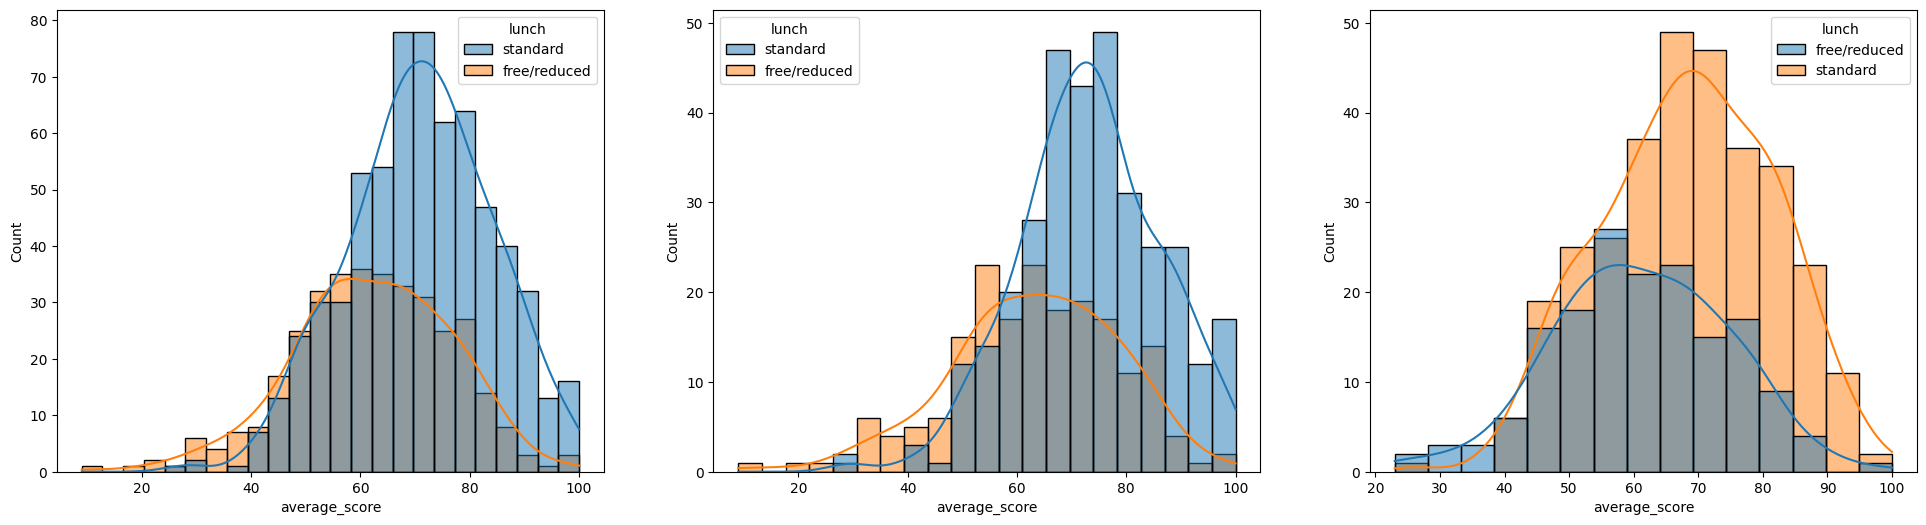

In [17]:
plt.subplots(1, 3, figsize=(24, 6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='lunch')
plt.show()

# Standard lunch helps prepare well in exams irrespective of the gender

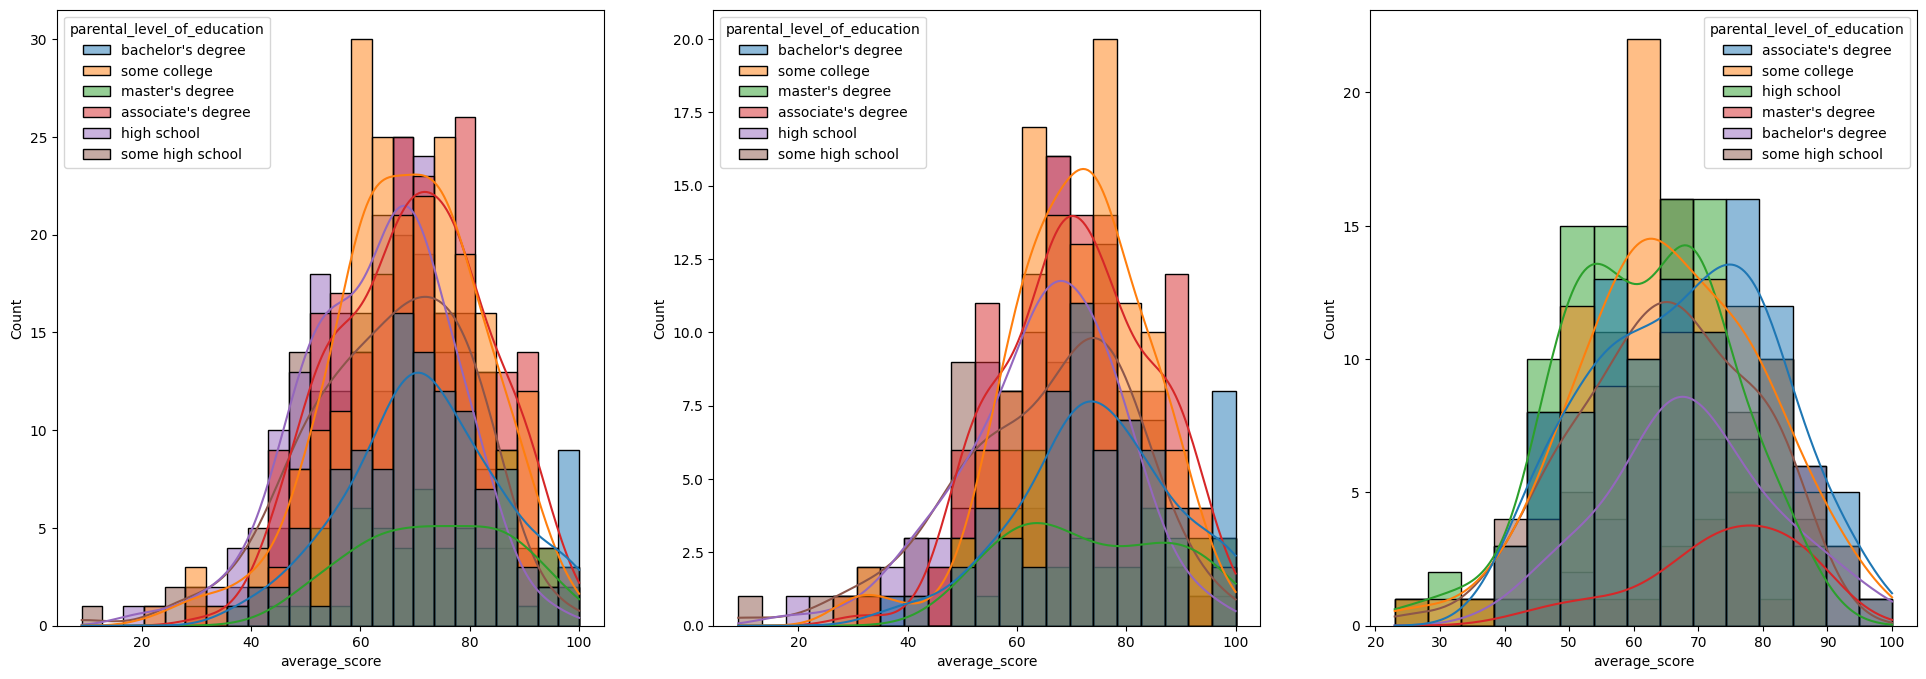

In [18]:
plt.subplots(1, 3, figsize=(24, 8))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

# Plot 1 and 3: In general, parents' education does not contribute much to the student's performance in exams.
# Plot 2: Male students with parents with an Associate or Masters Degree have performed well in their exams.

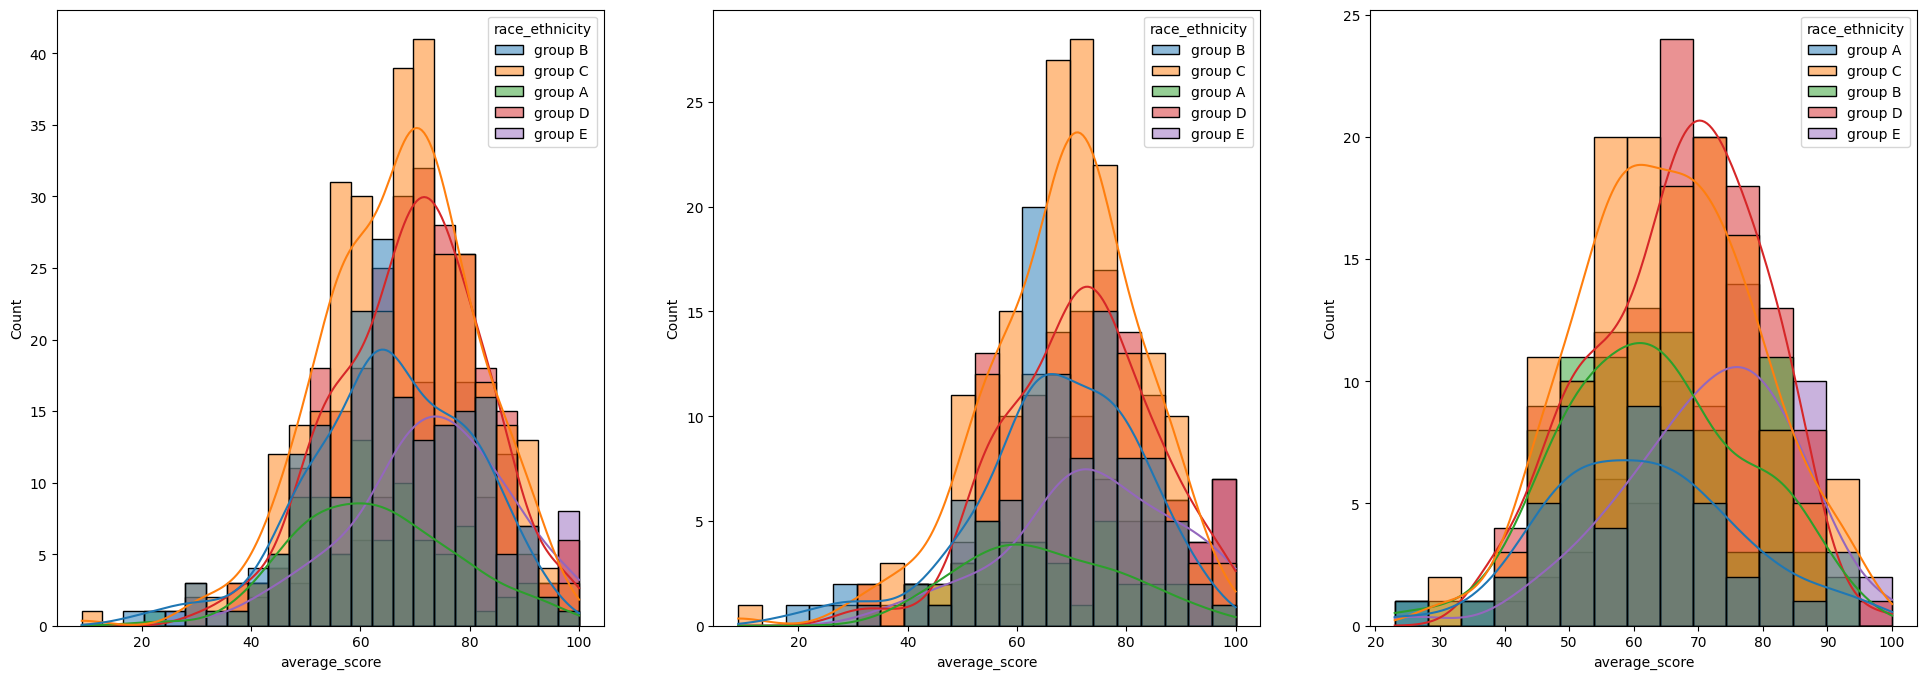

In [19]:
plt.subplots(1, 3, figsize=(24, 8))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='race_ethnicity')
plt.show()

# Students of Groups A and B tend to perform oorly in exams irrespective of their gender.

4.2 Maximum score of students in all 3 subjects

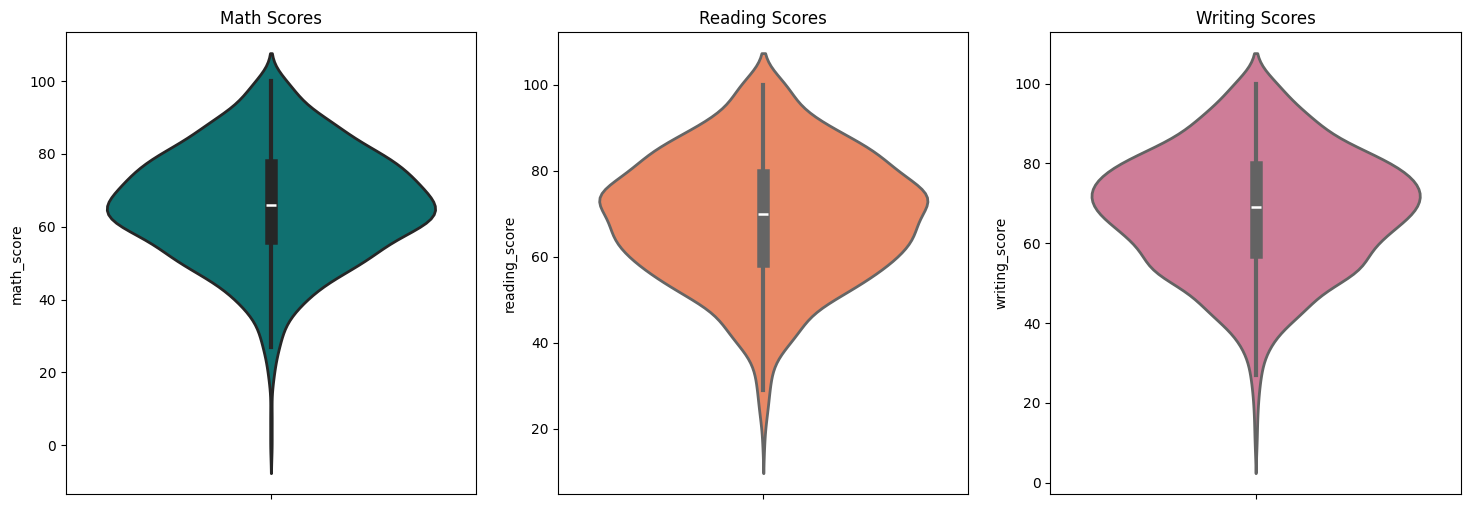

In [44]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y = 'math_score', data=df, color='teal', linewidth=2)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading_score', data=df, color='coral', linewidth=2)
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y = 'writing_score', data=df, color='palevioletred', linewidth=2)
plt.show()

# In case of Math, most of the students have scored between 60 to 80.
# Whereas in case of Reading and Writing, most f the students have scored between 50 to 80.

4.3 Multivariate Analysis using PiePlot

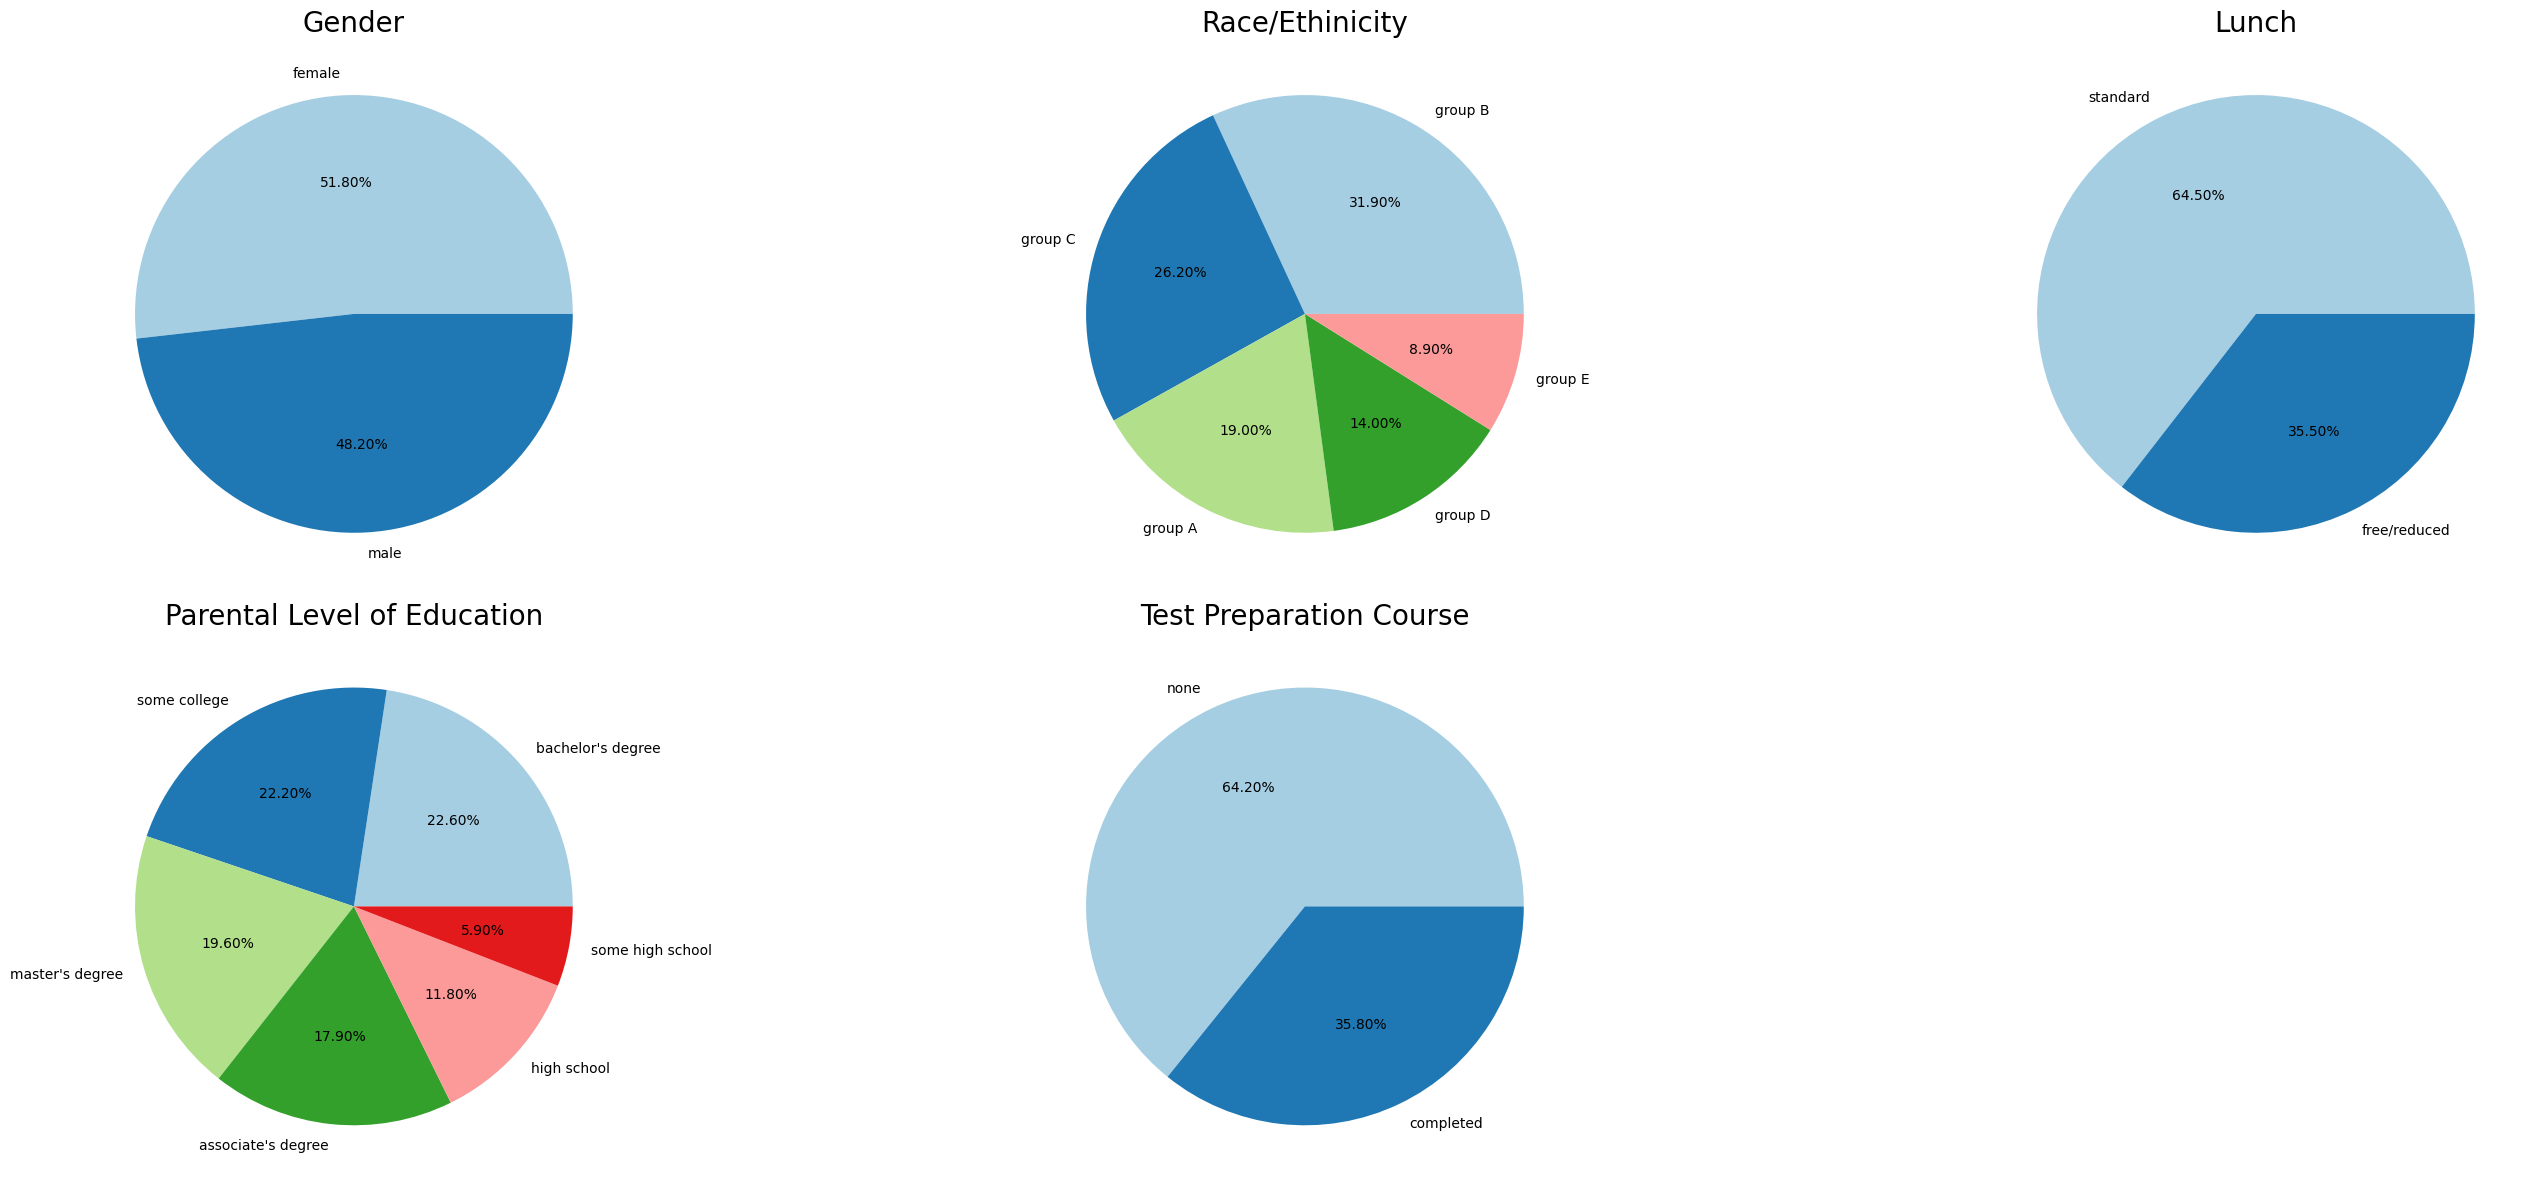

In [59]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2, 3, 1)
plt.pie(df['gender'].value_counts(), colors=sns.color_palette("Paired"), labels=df['gender'].unique(), autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.pie(df['race_ethnicity'].value_counts(), colors=sns.color_palette("Paired"), labels=df['race_ethnicity'].unique(), autopct='%.2f%%')
plt.title('Race/Ethinicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.pie(df['lunch'].value_counts(), colors=sns.color_palette("Paired"), labels=df['lunch'].unique(), autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.pie(df['parental_level_of_education'].value_counts(), colors=sns.color_palette("Paired"), 
        labels=df['parental_level_of_education'].unique(), autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.pie(df['test_preparation_course'].value_counts(), colors=sns.color_palette("Paired"), 
        labels=df['test_preparation_course'].unique(), autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


Insights
- Number of Male and Female students is almost equal.
- Number of students is the highest in Group B.
- Number of students who opt for Standard Lunch is higher.
- Number of students whose parental education is 'Some College' is the highest followed by 'Bachelor's Degree'.
- Number of students who have not enrolled in any test preparation course is greater.

4.4 Univariate Analysis (Feature-wise visualization)

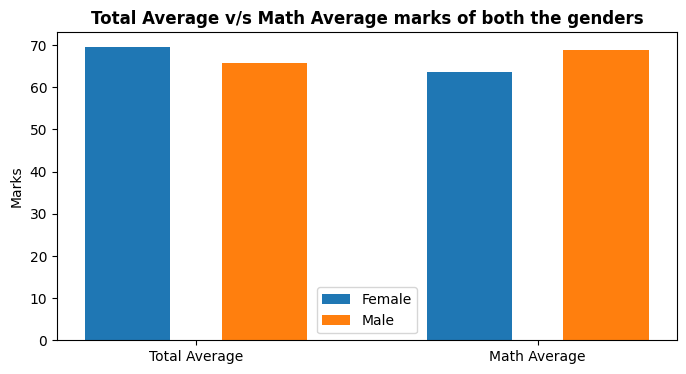

In [76]:
df_grouped = df[['gender', 'average_score', 'math_score']]
gender_group = df_grouped.groupby('gender').mean()

plt.figure(figsize=(8,4))
X = ['Total Average', 'Math Average']
female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, female_scores, 0.25, label='Female')
plt.bar(X_axis + 0.2, male_scores, 0.25, label='Male')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total Average v/s Math Average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

# On an average, females have a better overall score than males.
# However, when just math_score is considered, males haver performed better than females.

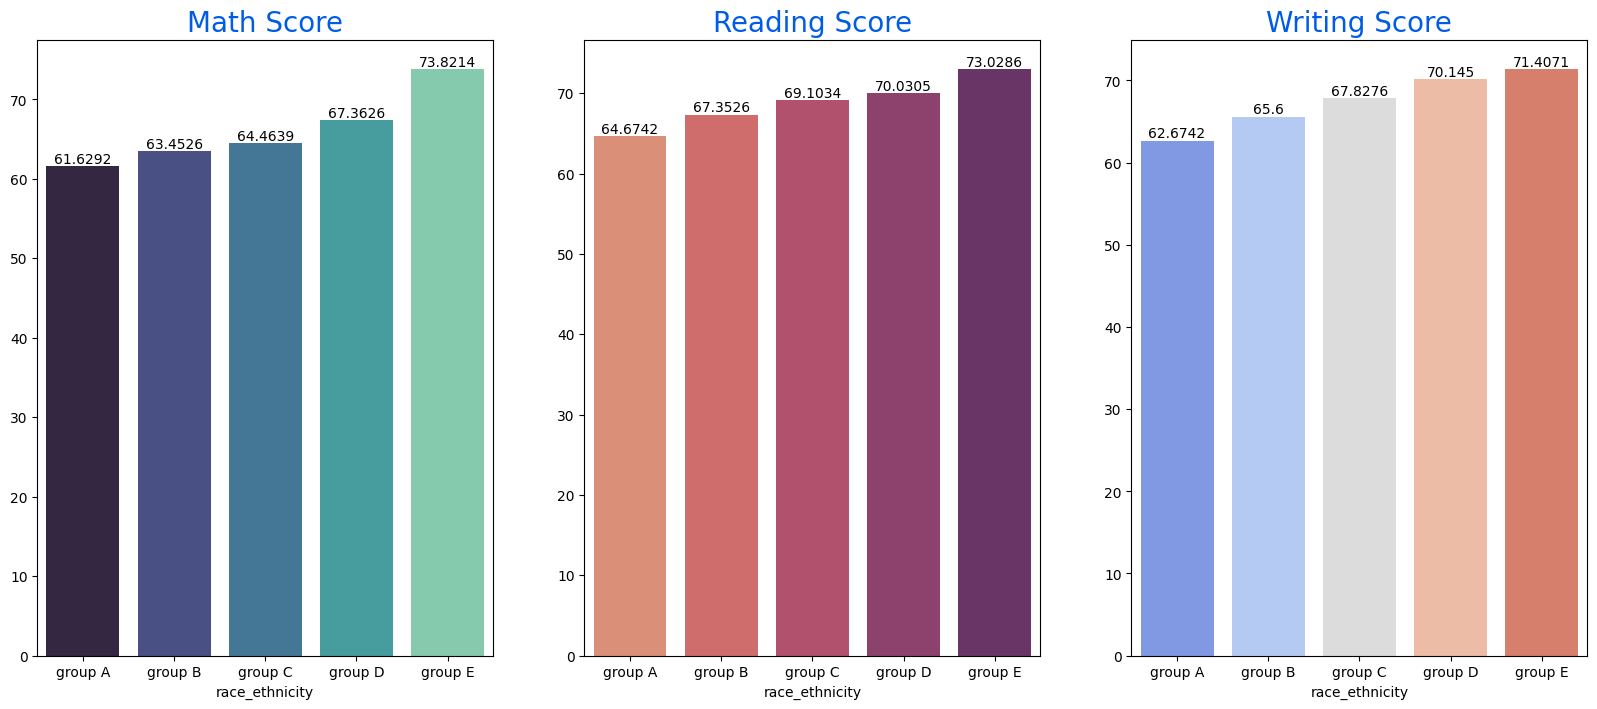

In [ ]:
race_group = df.groupby('race_ethnicity')

fig, ax = plt.subplots(1, 3, figsize=(20,8))

sns.barplot(x=race_group['math_score'].mean().index, y=race_group['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.barplot(x=race_group['reading_score'].mean().index, y=race_group['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

sns.barplot(x=race_group['writing_score'].mean().index, y=race_group['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)

# Group E students have scored the highest marks.
# Group A students have scored the lowest marks.

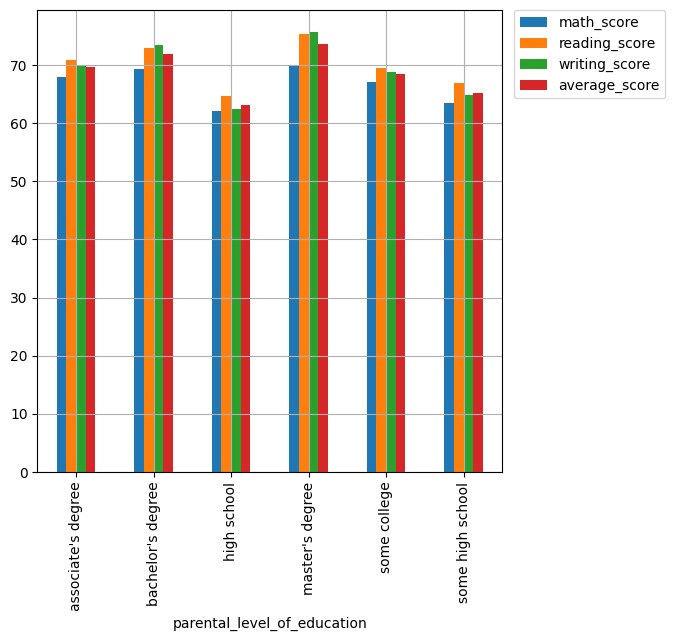

In [110]:
df_grouped = df[['parental_level_of_education', 'math_score', 'reading_score', 'writing_score', 'average_score']]
df_grouped.groupby('parental_level_of_education').agg('mean').plot(kind='bar', figsize=(6,6), grid=True)
plt.legend(bbox_to_anchor=(1.025,1), loc=2, borderaxespad=0.)
plt.show()

# The scores of students whose parents have a Bachelor's or a Master's Degree are higher than other students.

<Axes: xlabel='lunch', ylabel='writing_score'>

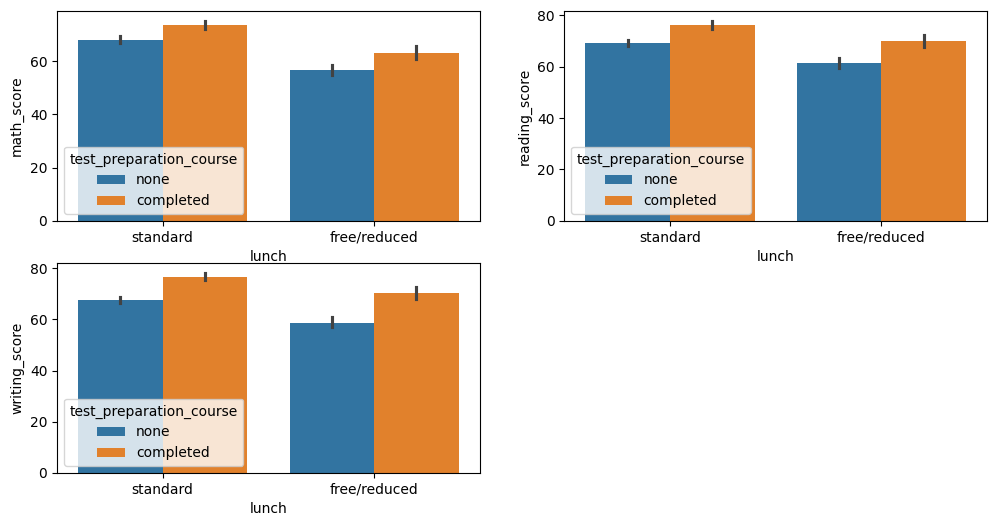

In [113]:
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Students who have completed the test preparation course have higher scores in all the three categories than those who haven't taken any course.

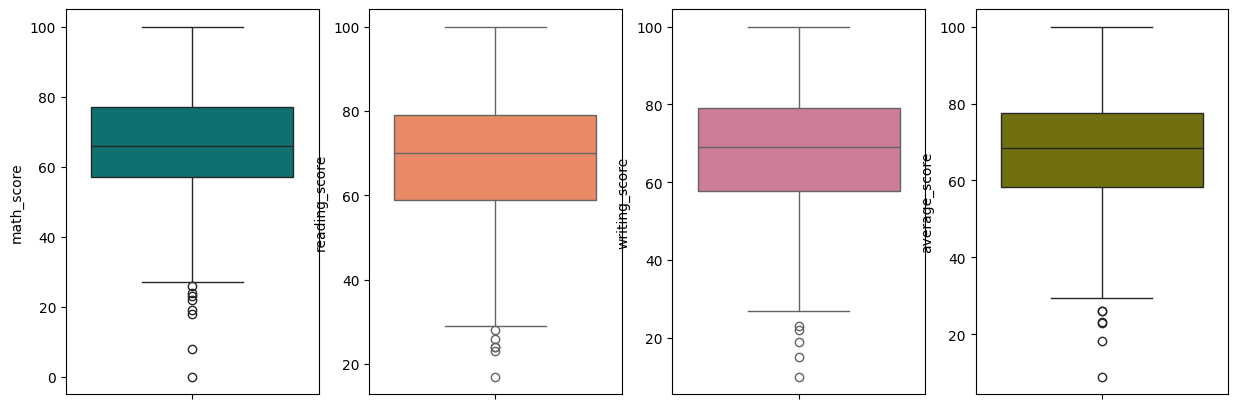

In [118]:
# Checking Outliers

plt.subplots(1, 4, figsize=(15, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='teal')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='coral')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='palevioletred')
plt.subplot(144)
sns.boxplot(df['average_score'], color='olive')
plt.show()

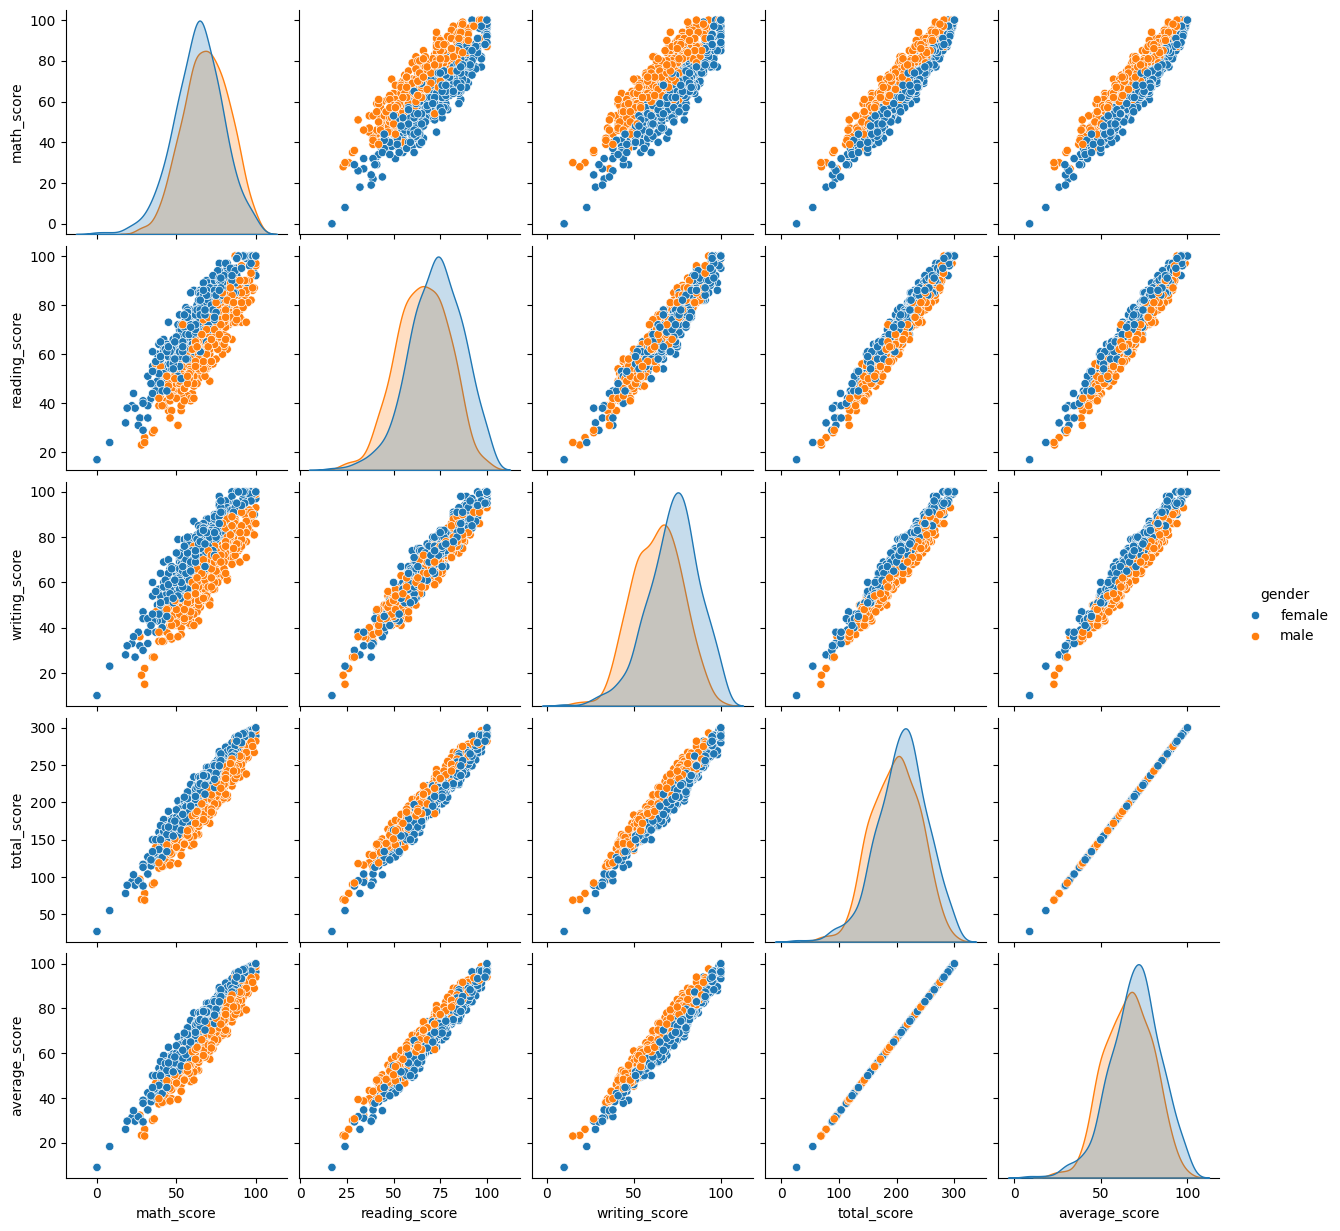

In [119]:
# Multivariate Analysis

sns.pairplot(df, hue='gender')
plt.show()

Conclusions:

- Students' performance is linked with lunch, race and parental level of education.
- Females lead in pass percentages and also are top scorers.
- Finishing the test preparation course is also beneficial in scoring good marks.